# Wilson分数相关测试

In [16]:
%matplotlib inline  
import scipy.stats as sps
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

sb.set_theme(style="whitegrid")


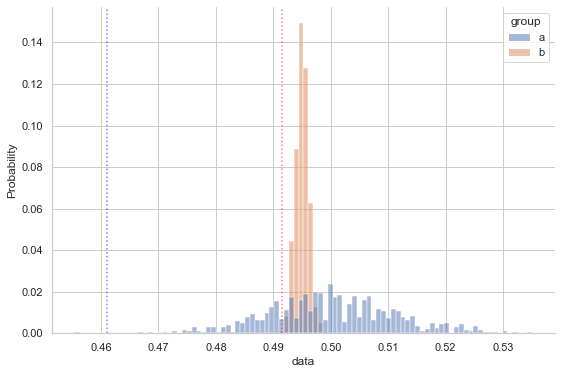

In [34]:
a = sps.binom(2, 0.5)
b = sps.binom(200, 0.495)
a_sample = [a.rvs(1000).sum() / 2 / 1000 for _ in range(1000)]
b_sample = [b.rvs(1000).sum() / 200 / 1000 for _ in range(1000)]
df = pd.DataFrame({
    "group": ["a"] * 1000 + ["b"] * 1000,
    "data": a_sample + b_sample
})

f, ax = plt.subplots(figsize=(9, 6))
sb.despine(f)
g = sb.histplot(df, x="data", hue="group", stat = "probability")
g.axvline(np.percentile(a_sample, 0.05), c="blue", alpha=0.5, linestyle=":")
g.axvline(np.percentile(b_sample, 0.05), c="red", alpha=0.5, linestyle=":")

In [21]:
def W(pos, n, confidence=0.95):
    z = sps.norm.pdf((1 - confidence)/2, 0, 1)
    phat = pos / n
    return (
        (phat + z ** 2 / (2 * n) - z * np.sqrt((phat * (1 - phat) + z ** 2 / (4 * n)) / n)) / (1 + z ** 2 / n),
        (phat + z ** 2 / (2 * n) + z * np.sqrt((phat * (1 - phat) + z ** 2 / (4 * n)) / n)) / (1 + z ** 2 / n)
    )

display(W(1, 2))
display(W(99, 200))

(0.364289812745783, 0.635710187254217)

(0.0, 0.13722854687378347)

(0.4809099483722197, 0.5090979980832595)